## Excercises on ice sheet modeling at GIA training school 2023
© Torsten Albrecht, albrecht@pik-potsdam.de, PIK, 2023


### 2 Unbuttressed ice shelves

#### Q2: Estimate distance to grounding line

Robin and Cleo are on field work on an Antarctic ice shelf. They have drilled an ice core of 400m length all the way down to the ice shelf base to take measurements of the melting below (CTD: temperature and salinity profiles). 

They measure no effective melting nor refreezing. Also the katabatic winds blow away all the snow on the ice shelf. Cleo remembers from sattelite imagery and ground-penetrating radar maps, that the ice flow across the grounding line has about 1km/yr speed, and that the bed lays about 1km below the ice surface. In an old hand book on glacier dynamics in the drill camp they found an analytical solution for the ice shelf thickness:

$$
H(x) = \left( \frac{(n+1) C}{H_0 u_0}x  + \frac{1}{H_0^{n+1}}  \right)^{-\frac{1}{n+1}}
$$

for

$$
C = A_0 \left[\frac{\rho_i g}{4}  \left(1 - \frac{\rho_i}{\rho_w}\right) \right]^n 
$$

with $n=3$, $g=9.81 \,\text{m s}^{-2}$ and $A_0 = 2.28 \times 10^{-25} \text{Pa}^{-1/n} \,\text{s}^{-1}$.

The field work team would like to take samples of the sub-glacial till by drilling at the grounding zone. 
**How far is the grounding line, assuming that the ice shelf is freely floating?**

Rearranging the analytical solution yields

  ``` python
xc = (Hc ** (-(n+1.0)) - H0 ** (-(n+1))) * U0 * H0 / ((n+1) * C * spa) * 1e-3
  ```
  
<!--
Hint: $C(B0) = 1.5678\times 10^{-18} \text{m}^{1/n} \text{s}^{-1} $ for $B0 = 1.9 \times 10^8 \text{Pa} \,\text{s}^{1/n}$, $n=3$ and $g=9.81 \,\text{kg s}^{-2}$

$C(B_0) = 2.4511\times 10^{-18} \text{m}^{1/n} \text{s}^{-1} $ for
-->

In [1]:
%matplotlib inline
%config InlineBackend.figure_formats = {'svg',}

import matplotlib.pylab as plt
from matplotlib import cm, colors
import netCDF4 as nc
import numpy as np

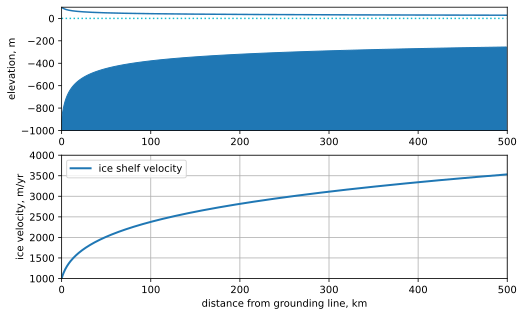

In [2]:
# ice flux at grounding line
U0 = 1000  # m/yr
H0 = 1000  # m

spa=60*60*365.25*24 # s per year

# densities
#rhoi=910.0
rhoi=900.0 #MISMIP
rhofw=1.0e3
#rhosw=1028.0
rhosw=rhofw # MISMIP

n = 3.0 # glen's flow law exponent
g = 9.81 #kg/s2
A0 = 2.28e-25 #Pa-1/3 s-1
C = (rhoi * g * (1.0 - rhoi/rhosw) / 4.0)**n * A0

#ice shelf geometry and spatial resolution
L = 5e2 #km
dx = 1.0  # km
x = np.arange(0, L, dx)
xm = x * 1e3 # x in m

######################################################

# ice thickness and velocity analytical solution
Han = (xm * (n+1) * C / (U0 * H0 / spa)  +  H0 ** (-(n+1))) ** (-1/(n+1))
Uan = U0 * H0 / Han

# upper and lower surface of floating ice shelf
han = (1.0-rhoi/rhosw) * Han
lan = han - Han

################################################################
fig = plt.figure(1,figsize=(8,5))
ax1 = fig.add_subplot(2,1,1)

# sea level 0
ax1.plot(x, np.zeros_like(x), ls='dotted', color='C9')

ax1.plot(x, han, color='C0')

# ocean water
#ax.plot(x, lan, color='C1')
ax1.fill_between(x,-1e3,lan,color='C0')

#ax1.set_xlabel('distance from grounding line, km')
ax1.set_ylabel('elevation, m')
ax1.set_xlim(0,L)
ax1.set_ylim(-H0,H0/10.0)

ax2 = fig.add_subplot(2,1,2)
ax2.plot(x, Uan, color='C0', linewidth=2,label='ice shelf velocity')
ax2.set_ylabel('ice velocity, m/yr')
ax2.set_xlabel('distance from grounding line, km')
ax2.set_xlim([0, L])
ax2.set_ylim([U0, 4*U0])
plt.grid(True)
plt.legend()



<div class="alert alert-block alert-info">
<details>
  <summary><b>A2:</b> click to show solution</summary>

$$
x_c = \frac{u_0 H_0}{(n+1) C} \left( H_{c}^{-(n+1)} - H_0^{-(n+1)}  \right)
$$

with $u_0 = 1\,\text{km/yr}$, $H_0 = 1\,\text{km}$, $H_c = 400\,\text{m}$, $n=3$


Grounding line is about $123 \text{km}$ upstream. 
The drill camp drifts with $2.5 \text{km/yr}$ downstream.
    
</details>
    </div>

In [3]:
Hc = 400  # m, calving thickness
n = 3.0

# exact van der veen solution
xc = (Hc ** (-(n+1.0)) - H0 ** (-(n+1))) * U0 * H0 / ((n+1) * C * spa) * 1e-3
print(np.around(xc,decimals=1),'km')

Uc = U0 * H0 / Hc
print(np.around(Uc,decimals=1),'m/yr')

dx = Uc /12.0
print(np.around(dx,decimals=1),'m')

123.0 km
2500.0 m/yr
208.3 m


#### Q2b: Glen's flow law parameter

Robin finds a new observational study, which suggest, that Glen's flow law parameter for ice shelf flow should be rather $n=4$ instead of $n=3$.

**What would a higher flow law exponent mean for the distance to the grounding line?**

Hint: C is a function of ice softness $A_0$

  ``` python
C = (rhoi * g * (1.0 - rhoi/rhosw) / 4.0)**n * A0
  ```
  
and needs to be recalculated with respect to a reference stress $\tau_0$ (e.g. $50 \text{kPa}$), such that the strain rate remains the same

  ``` python
A0_new * tau0**n_new = A0 * tau0**n
  ```

<div class="alert alert-block alert-info">
<details>
<summary><b>A2b:</b> click to show solution</summary>

The grounding line would be only about $57 \text{km}$ away. The drift speed would be the same as before.
Can this be true?
    
</details>
</div>

56.6 km


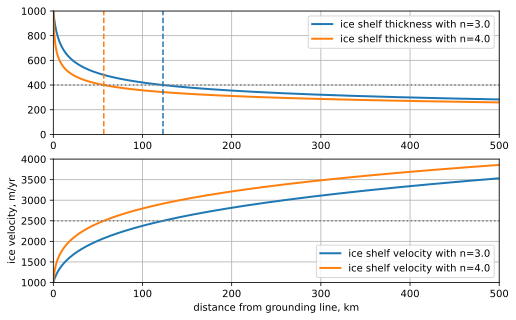

In [4]:
nn = 4.0

tau_ref = 50e3 #Pa
A0_new = tau_ref**(n-nn) * A0
Cn = (rhoi * g * (1.0 - rhoi/rhosw) / 4.0)**nn * A0_new

xcg = (Hc ** (-(nn+1.0)) - H0 ** (-(nn+1))) * U0 * H0 / ((nn+1) * Cn * spa) * 1e-3
print(np.around(xcg,decimals=1),'km')

Hang = (xm * (nn+1) * Cn / (U0 * H0 / spa)  +  H0 ** (-(nn+1))) ** (-1/(nn+1))
Uang = U0 * H0 / Hang



############################################################################

fig = plt.figure(2,figsize=(8,5))

ax1 = fig.add_subplot(2,1,1)
ax1.plot(x, Han, color='C0', linewidth=2,label='ice shelf thickness with n=3.0')
ax1.plot(x, Hang, color='C1', linewidth=2,label='ice shelf thickness with n=4.0')
ax1.set_xlim([0, L])
ax1.set_ylim([0, H0])#
ax1.axhline(Hc,color='C7',ls="dotted")
ax1.axvline(xc,color='C0',ls="dashed")
ax1.axvline(xcg,color='C1',ls="dashed")
ax2.set_ylabel('ice thickness, m')
ax2.set_xlabel('distance from grounding line, km')
plt.grid(True)
plt.legend()

ax2 = fig.add_subplot(2,1,2)
ax2.plot(x, Uan, color='C0', linewidth=2,label='ice shelf velocity with n=3.0')
ax2.plot(x, Uang, color='C1', linewidth=2,label='ice shelf velocity with n=4.0',ls='solid')
ax2.axhline(Uc,color='C7',ls="dotted")
ax2.set_xlim([0, L])
ax2.set_ylim([U0, 4*U0])
ax2.set_ylabel('ice velocity, m/yr')
ax2.set_xlabel('distance from grounding line, km')

plt.grid(True)
plt.legend()


#### Q2c*: Melting and accumulation

There is an analytical solution if accumulation (M>0) or melt (M<0) is considered:

$$
H_p(x) = \left[ \frac{C}{M} - \frac{ u_0^{n+1}\left(\frac{C}{M}H_0^{n+1}-1 \right)}{(M x + u_0 H_0)^{n+1}}   \right]^{\frac{-1}{n+1}} , M>0
$$

and 

$$
H_n(x) = \left[ -\frac{C}{M} + \frac{ u_0^{n+1}\left(\frac{C}{M}H_0^{n+1}+1 \right)}{(-M x + u_0 H_0)^{n+1}}   \right]^{\frac{-1}{n+1}} , M<0
$$

**How far would be the grounding line in the case of $1\text{m/yr}$ melt or accumulation?**

<div class="alert alert-block alert-info">
<details>
<summary><b>A2c*:</b> click to show solution</summary>

Rearranging yields

$$
x_p = -\frac{u_0 H_0}{M} + \frac{1}{M} \left[  \frac{ u_0^{n+1}\left(\frac{C}{M}H_0^{n+1}-1 \right)}{\left( H_c^{-(n+1)} -\frac{C}{M}\right) }  \right]^{\frac{1}{n+1}} , M>0
$$

and 

$$
x_n = \frac{u_0 H_0}{M} -\frac{1}{M} \left[  \frac{ u_0^{n+1}\left(\frac{C}{M}H_0^{n+1}+1 \right)}{\left( H_c^{-(n+1)} +\frac{C}{M}\right) }  \right]^{\frac{1}{n+1}} , M<0
$$

The grounding line distance would be $188\text{km}$ in the case of accumulation and $94\text{km}$ in case of melt.
</details>
</div>

M=1m/yr: 188.2 km
M=-1m/yr: 94.2 km


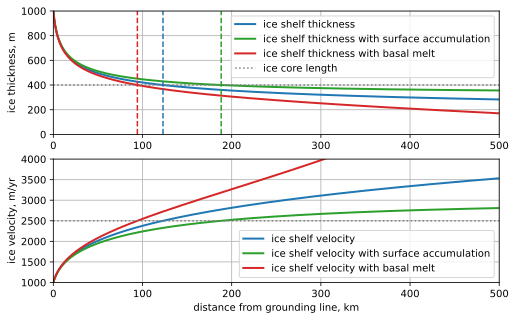

In [5]:
n = 3.0
M = 1.0/spa #m/s

H1p = (U0/spa)**(n+1.0) * ( (C/M * H0**(n+1.0)) - 1.0 )
H1n= (U0/spa)**(n+1.0) * ( (C/M * H0**(n+1.0)) + 1.0 )

H2p = ( M * xm + (U0 * H0 / spa) )**(n+1.0)
Hanp = ( C/M - ( H1p / H2p ) ) ** (-1.0/(n+1.0))
Uanp = (U0 * H0 + M * xm) / Hanp[:]

H2n = ( -M * xm + (U0 * H0 / spa) )**(n+1.0)
Hann = ( -C/M + ( H1n / H2n ) ) ** (-1.0/(n+1.0))
Uann = (U0 * H0 - M * xm) / Hann[:]

H3p = (Hc**(-(n+1))- C/M) #
H3n = (Hc**(-(n+1))+ C/M) #

xcp = (- U0 * H0 /spa  + ((-H1p / H3p) ** (1.0/(n+1.0))) ) / M * 1e-3 #km
print('M=1m/yr:',np.around(xcp,decimals=1),'km')

xcn = ( U0 * H0 /spa  - ((H1n / H3n) ** (1.0/(n+1.0))) ) / M * 1e-3 #km
print('M=-1m/yr:',np.around(xcn,decimals=1),'km')


############################################################################

fig = plt.figure(3,figsize=(8,5))
ax1 = fig.add_subplot(2,1,1)

ax1.plot(x, Han, color='C0', linewidth=2,label='ice shelf thickness')
ax1.plot(x, Hanp, color='C2', linewidth=2,label='ice shelf thickness with surface accumulation')

#Hcr = ( M/C ) ** (1.0/(n+1.0))
#ax1.axhline(Hcr,color='C2',ls="dashed") #Hcr

#Lcr = ( H0*U0/spa / M) *1e-3
#ax1.plot(x[x<Lcr], Hanp2[x<Lcr], color='C3', linewidth=2,label='ice shelf thickness with basal melt')
#ax1.axvline( Lcr,color='C3',ls="dashed") #Lcr

ax1.plot(x, Hann, color='C3', linewidth=2,label='ice shelf thickness with basal melt')
ax1.set_xlim([0, L])
ax1.set_ylim([0, H0])
#ax1.set_ylim([350, 450])
ax1.axhline(Hc,color='C7',ls="dotted",label='ice core length')

ax1.axvline(xc,color='C0',ls="dashed")
ax1.axvline(xcp,color='C2',ls="dashed")
ax1.axvline(xcn,color='C3',ls="dashed")
#ax1.set_xlabel('distance from grounding line, km')
ax1.set_ylabel('ice thickness, m')
plt.grid(True)
ax1.legend()


ax2 = fig.add_subplot(2,1,2)
ax2.plot(x, Uan, color='C0', linewidth=2,label='ice shelf velocity')
ax2.plot(x, Uanp, color='C2', linewidth=2,label='ice shelf velocity with surface accumulation')
ax2.plot(x, Uann, color='C3', linewidth=2,label='ice shelf velocity with basal melt')
ax2.axhline(Uc,color='C7',ls="dotted")
ax2.set_xlim([0, L])
ax2.set_ylim([U0, 4*U0])
ax2.set_ylabel('ice velocity, m/yr')
ax2.set_xlabel('distance from grounding line, km')
plt.grid(True)
ax2.legend()


(-1000.0, 100.0)

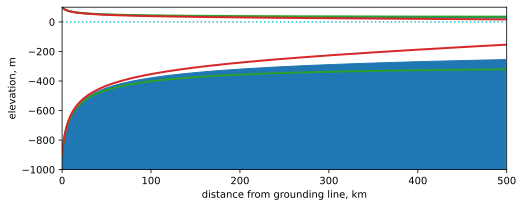

In [6]:
# upper and lower surface of ice shelf
han = (1.0-rhoi/rhosw) * Han
lan = han - Han

hanp = (1.0-rhoi/rhosw) * Hanp
lanp = hanp - Hanp

hann = (1.0-rhoi/rhosw) * Hann
lann = hann - Hann


#######################################################

fig = plt.figure(4,figsize=(8,3))
ax = fig.add_subplot(1,1,1)

# sea level 0
ax.plot(x, np.zeros_like(x), ls='dotted', color='C9')
ax.plot(x, han, color='C0')

# ocean water
#ax.plot(x, lan, color='C1')
ax.fill_between(x,-1e3,lan,color='C0')

ax.plot(x, hanp, color='C2', linewidth=2,label='ice shelf velocity with surface accumulation')
ax.plot(x, lanp, color='C2', linewidth=2)

ax.plot(x, hann, color='C3', linewidth=2,label='ice shelf velocity with surface accumulation')
ax.plot(x, lann, color='C3', linewidth=2)

ax.set_xlabel('distance from grounding line, km')
ax.set_ylabel('elevation, m')

ax.set_xlim(0,L)
ax.set_ylim(-1000,100)


### just some more theory...

The first of the two equations of motion of a vertically integrated ice shelf 
in Shallow Shelf Approximation (SSA) reads

$$
4 \frac{\partial}{\partial x}\left(\tilde{\nu} \frac{\partial u}{\partial x} \right) + 
2 \frac{\partial}{\partial x}\left(\tilde{\nu} \frac{\partial v}{\partial y} \right) +
  \frac{\partial}{\partial y}\left(\tilde{\nu} (\frac{\partial u}{\partial y} +  \frac{\partial v}{\partial x})\right) =
\rho \, g \, H \frac{\partial h}{\partial x}.
$$

This is a non-linear second order elliptical boundary value problem for the depth-independent horizontal velocities $u$ and $v$ (Morland 1987, [MacAyeal 1989](https://doi.org/10.1029/JB094iB04p04071), [Weis et al. 1999](https://doi.org/10.1007/s001610050102), [Schoof 2006](https://doi.org/10.1017/S0022112006009591)),

with ice surface elevation (flotation condition)

$$
h = \left(1 - \frac{\rho_i}{\rho_{sw}}  \right) H
$$

and ice viscosity
$$
\tilde{\nu} = \int_b^h \nu \, dz
$$

and based on Nye's generalization of **Glen's flow law** ([Nye, 1953](https://doi.org/10.3189/S0022143000033967); [Glen, 1958](http://go.owu.edu/~chjackso/Climate/papers/Glen_1958_The%20flow%20law%20of%20ice.pdf)]), for $n=3$ the flow law exponent

$$
2 \, \nu = A(T)^{-1/n} \left|\frac{\partial u}{\partial x}\right|^{(1-n)/n} = B_0 \left|\frac{\partial u}{\partial x}\right|^{(1-n)/n}
$$

with $A(T)$ the (generally temperature-dependent) ice softness, and $B_0$ the constant ice hardness. This constitutive equation means that the deformation rate of the ice increases with the power $n$ of the applied stress.



For an ice shelf, which flow along the x-direction (no lateral variation in y-direction), this simplifies to

$$
4 \frac{\partial}{\partial x}\left(\tilde{\nu} \frac{\partial v_x}{\partial x} \right) =
\rho \, g \, H \frac{\partial h}{\partial x}.
$$

The **ice thickness evolution** equation for net accumulation (or ablation) M is given by

$$
\frac{\partial H}{\partial t} = -\frac{\partial }{\partial x}\left( u H \right) + M
$$


Integration yields
$$
4 \tilde{\nu} \frac{\partial u}{\partial x}  =
\frac{1}{2} \rho \, g \, H^2 \left(1 - \frac{\rho_i}{\rho_{sw}}  \right) .
$$

Inserting the viscosity from Glen's flow law
$$
2 B_0 H \left|\frac{\partial u}{\partial x}\right|^{1+\frac{1-n}{n}}  = 2 B_0 H \left|\frac{\partial u}{\partial x}\right|^{\frac{1}{n}} =
\frac{1}{2} \rho \, g \, H^2 \left(1 - \frac{\rho_i}{\rho_{sw}}  \right) .
$$

And some rearranging
$$
\frac{\partial u}{\partial x}  =
\left[\frac{\rho \, g}{4 B_0}  \left(1 - \frac{\rho_i}{\rho_{sw}}  \right) H^2 \right]^n = C H^{n+2}.
$$

Assume steady state $\frac{\partial H}{\partial t} \rightarrow 0$ and $M=0$.

$$
\frac{\partial }{\partial x}\left( u H \right) = 0 =H \frac{\partial u}{\partial x}+   u \frac{\partial H}{\partial x}
$$

and 

$$
\frac{\partial H}{\partial x} = -\frac{H}{u} \frac{\partial u}{\partial x} = -\frac{C H^{n+1}}{u} = -\frac{C H^{n+2}}{Q_0}
$$

with the (one-dimensional horizontal) ice flux $Q_0 = u_0 H_0 = u H$. 

Integration from the grounding line at $x_{gl}=0$ to position $x$ yields
$$
H(x) = \left( \frac{(n+1) C}{Q_0}x  + \frac{1}{H_0^{n+1}}  \right)^{-\frac{1}{n+1}}
$$
and 
$$
u(x) = \frac{Q_0}{H(x)} = Q_0 \left( \frac{(n+1) C}{Q_0}x  + \frac{1}{H_0^{n+1}}  \right)^{\frac{1}{n+1}}
$$



This is the **van der Veen analytical solution** (see [van der Veen 1983, 1999, 2013, "Fundamentals of Glacier Dynamics"](https://doi.org/10.3189/2014JoG13J214))